# Predicting on new samples

The model can be loaded from disk, and used to predict on unseen samples. Here, we keep using the DustPedia and H-ATLAS datasets, but these can be replaced by other UV-NIR SED fitted datasets.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_columns = 99

In [2]:
os.chdir('..')  # change to root directory

In [3]:
# Load data
import pickle
from firenet.util import add_uncertainty_features
with open('./data/d_data.pkl', 'rb') as infile:
    d_data = pickle.load(infile)
    
d_data = add_uncertainty_features(d_data)
d_data.keys()

dict_keys(['fullbay', 'fullbayerr', 'shortbay', 'shortbayerr', 'redshift', 'observed', 'observederr', 'obserr_to_short', 'obs_to_short'])

In [4]:
# Load predictor that uses all data
from firenet.ml.modelstore import ModelStore

pred = ModelStore().load(d_data, name='nnet_alldata')

In [5]:
from firenet.ml import FeatureSelect

X_reg = FeatureSelect.select_xreg(d_data)
X_unc = FeatureSelect.select_xunc(d_data)
X_reg.head()

,GALEX_FUV,GALEX_NUV,SDSS_u,SDSS_g,SDSS_r,SDSS_i,SDSS_z,2MASS_J,2MASS_H,2MASS_Ks,WISE_3.4,WISE_4.6,WISE_12,WISE_22
id,,,,,,,,,,,,,,
NGC5358,1.756567e+19,3.544724e+19,3.709311e+20,1.694206e+21,3.080484e+21,4.145965e+21,5.426019e+21,6.893655e+21,8.360429e+21,6.609317e+21,3.423306e+21,2.013436e+21,5.835990e+20,2.759253e+20
NGC3252,6.295663e+19,1.014847e+20,3.032180e+20,1.022812e+21,1.527502e+21,1.894299e+21,2.336673e+21,2.844187e+21,3.403842e+21,2.767714e+21,1.838617e+21,1.113030e+21,3.448660e+21,4.372679e+21
ESO407-002,2.785232e+19,5.601229e+19,2.264886e+20,8.530379e+20,1.336088e+21,1.702040e+21,2.127060e+21,2.631649e+21,3.178567e+21,2.588323e+21,1.667594e+21,9.863319e+20,2.688774e+21,2.900365e+21
NGC4194,4.120649e+20,9.560917e+20,2.320822e+21,6.091552e+21,9.006956e+21,1.119523e+22,1.449513e+22,1.840004e+22,2.248789e+22,1.933412e+22,1.710598e+22,1.566078e+22,1.696050e+23,5.295668e+23
NGC7172,3.195182e+20,4.884440e+20,1.914068e+21,8.348678e+21,1.554232e+22,2.240839e+22,3.119440e+22,4.411116e+22,5.804870e+22,4.923501e+22,3.200892e+22,1.953044e+22,5.200287e+22,7.908303e+22


In [6]:
X_reg = pred.reg.log_normaliser.transform(X_reg)
X_unc = pred.unc.log_normaliser.transform(X_unc)
X_reg.head()

,GALEX_FUV,GALEX_NUV,SDSS_u,SDSS_g,SDSS_r,SDSS_i,SDSS_z,2MASS_J,2MASS_H,2MASS_Ks,WISE_3.4,WISE_4.6,WISE_12,WISE_22
id,,,,,,,,,,,,,,
NGC5358,-2.289781,-1.984863,-0.965152,-0.305480,-0.045827,0.083180,0.200036,0.304004,0.387783,0.285711,21.534446,-0.230508,-0.768331,-1.093654
NGC3252,-1.465450,-1.258091,-0.782736,-0.254695,-0.080509,0.012957,0.104107,0.189467,0.267478,0.177630,21.264491,-0.217984,0.273159,0.376256
ESO407-002,-1.777229,-1.473807,-0.867044,-0.291122,-0.096255,0.008880,0.105690,0.198138,0.280141,0.190928,21.222090,-0.228067,0.207464,0.240362
NGC4194,-1.618182,-1.252648,-0.867506,-0.448420,-0.278570,-0.184115,-0.071926,0.031671,0.118801,0.053176,22.233148,-0.038335,0.996291,1.490773
NGC7172,-2.000775,-1.816456,-1.223314,-0.583653,-0.313755,-0.154860,-0.011194,0.139277,0.258522,0.187003,22.505271,-0.214559,0.210756,0.392812


In [7]:
Y_pred, Y_prederr = pred.predict(X_reg, X_unc)

In [8]:
Y_pred.head()

,PACS_70,PACS_100,PACS_160,SPIRE_250,SPIRE_350,SPIRE_500
id,,,,,,
NGC5358,-0.270455,0.030907,0.161252,0.055492,-0.166314,-0.518062
NGC3252,1.419260,1.776322,1.917939,1.745621,1.433545,1.062444
ESO407-002,1.308402,1.694540,1.838174,1.674224,1.384507,1.007923
NGC4194,2.451906,2.523283,2.256691,1.751199,1.335191,0.864598
NGC7172,1.573876,1.918062,1.954708,1.709516,1.392164,0.981167


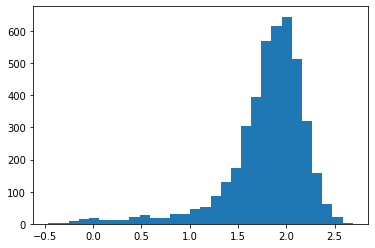

In [9]:
plt.hist(Y_pred['PACS_100'], bins=30);

In [10]:
F_input, F_pred = pred.reg.log_normaliser.inverse_transform(X_reg, Y_pred)
F_pred.head()

,PACS_70,PACS_100,PACS_160,SPIRE_250,SPIRE_350,SPIRE_500
id,,,,,,
NGC5358,1.836500e+21,3.675806e+21,4.962474e+21,3.889896e+21,2.334165e+21,1.038445e+21
NGC3252,4.827820e+22,1.098534e+23,1.522056e+23,1.023558e+23,4.989255e+22,2.122928e+22
ESO407-002,3.392286e+22,8.253350e+22,1.148853e+23,7.876157e+22,4.042008e+22,1.698296e+22
NGC4194,4.842326e+24,5.707301e+24,3.089153e+24,9.646004e+23,3.701173e+23,1.252408e+23
NGC7172,1.199904e+24,2.650531e+24,2.883889e+24,1.639784e+24,7.896506e+23,3.065052e+23
